Goals:
1. Menentukan model yg tepat untuk campaign produk yg terbaru
2. Orang orang mana yg mendapatkan campaign produk

Proses
Import Data
- import data
-
Data Quality Check
- Eksplorasi Data
- cek dimensi data (head, shape)
- korelasi antar variabel
- visualisasi data

Pre-Processing Data
- handle missing value
- scaling data
- konversi data string ke numerik

Data Modelling
- Membagi porsi tes dan train
- training model: Fit
- training model: predict
-  Decision Tree, Logistic Regression, XGBoost, dan Random Forest Forecasting.

Evaluasi model performance



Import data dulu dari google drive

In [ ]:
import pandas as pd
dataset= pd.read_csv('drive/MyDrive/marketing_data.csv')


Kita akan cek terlebih dahulu apakah ada data yg tidak logis

In [ ]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


* Kolom ID perlu dihapus karena tidak akan berpengaruh terhadap quality data
* Pada Marital Status. Married dan Together bisa dikategorikan sama

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Terdapat:

* Income ada spasinya
* Income harusnya float atau integer
* Dt_Customer harus tipe data date

In [ ]:
dataset.shape

(2240, 28)

Kolomnya ada 2240 dan barisnya ada 28

In [ ]:
dataset.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Pada data Year_Birth terdapat outlier (1893)

# Pre-Processing Data

1. Cleaning Data
2. Duplikat Value
3. Missing Value

In [ ]:
dataset.columns = dataset.columns.str.replace(' ', '')

In [ ]:
dataset.Income

,Income
0,"$84,835.00"
1,"$57,091.00"
2,"$67,267.00"
3,"$32,474.00"
4,"$21,474.00"
...,...
2235,"$66,476.00"
2236,"$31,056.00"
2237,"$46,310.00"
2238,"$65,819.00"


In [ ]:
dataset.Income = dataset.Income.str.replace('$', '')
dataset.Income = dataset.Income.str.replace(',', '')

In [ ]:
dataset.Income

,Income
0,84835.00
1,57091.00
2,67267.00
3,32474.00
4,21474.00
...,...
2235,66476.00
2236,31056.00
2237,46310.00
2238,65819.00


In [ ]:
dataset['Income'] = dataset['Income'].astype('float')
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'])

<ipython-input-45-c3f46429321c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'])


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
dataset.duplicated().sum()

0

Tidak ada data yg duplikat

In [ ]:
dataset.isna().sum().sort_values(ascending=False)

,0
Income,24
ID,0
NumDealsPurchases,0
Complain,0
Response,0
AcceptedCmp2,0
AcceptedCmp1,0
AcceptedCmp5,0
AcceptedCmp4,0
AcceptedCmp3,0


Banyak data Income yg missing, better di isi dengan mean

In [ ]:
dataset['Income'] = dataset['Income'].fillna(dataset['Income'].mean())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

<Axes: >

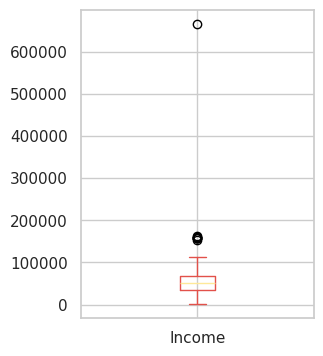

In [ ]:
dataset['Income'].plot(kind='box', figsize=(3,4))

Terdapat outlier income, namun itu bisa masuk akal

In [ ]:
dataset.isna().sum().sort_values(ascending=False)

,0
ID,0
Year_Birth,0
Complain,0
Response,0
AcceptedCmp2,0
AcceptedCmp1,0
AcceptedCmp5,0
AcceptedCmp4,0
AcceptedCmp3,0
NumWebVisitsMonth,0


Sudah tidak ada outlier

In [ ]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391


In [ ]:
dataset_to_plot = dataset.select_dtypes(include=['float','int'])
dataset_to_plot.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                               'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'],
               inplace=True)

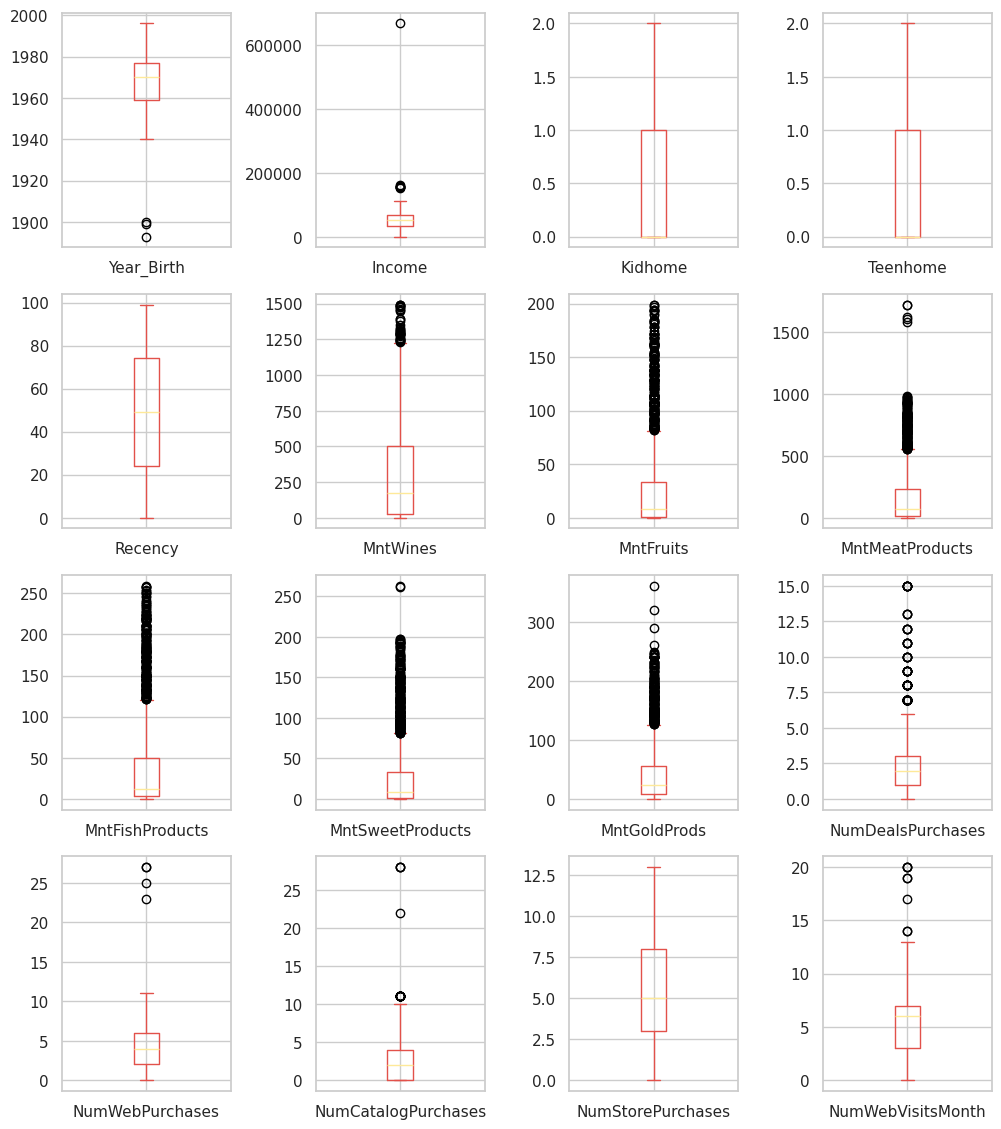

In [ ]:
dataset_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

Untuk tahun terdapat outlier yg tidak masuk akal dan perlu di drop

In [ ]:
dataset = dataset[dataset['Year_Birth'] > 1900].reset_index(drop=True)

In [ ]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,52236.696036,0.444345,0.506482,2013-07-10 05:01:54.260169728,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.072865,0.074654,0.072418,0.064372,0.013411,0.149307,0.008941
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2829.000000,1959.000000,35523.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,51717.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.000000,1977.000000,68281.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3245.118591,11.701917,25043.111847,0.538467,0.544593,NaN,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.259974,0.262890,0.259237,0.245469,0.115052,0.356471,0.094152


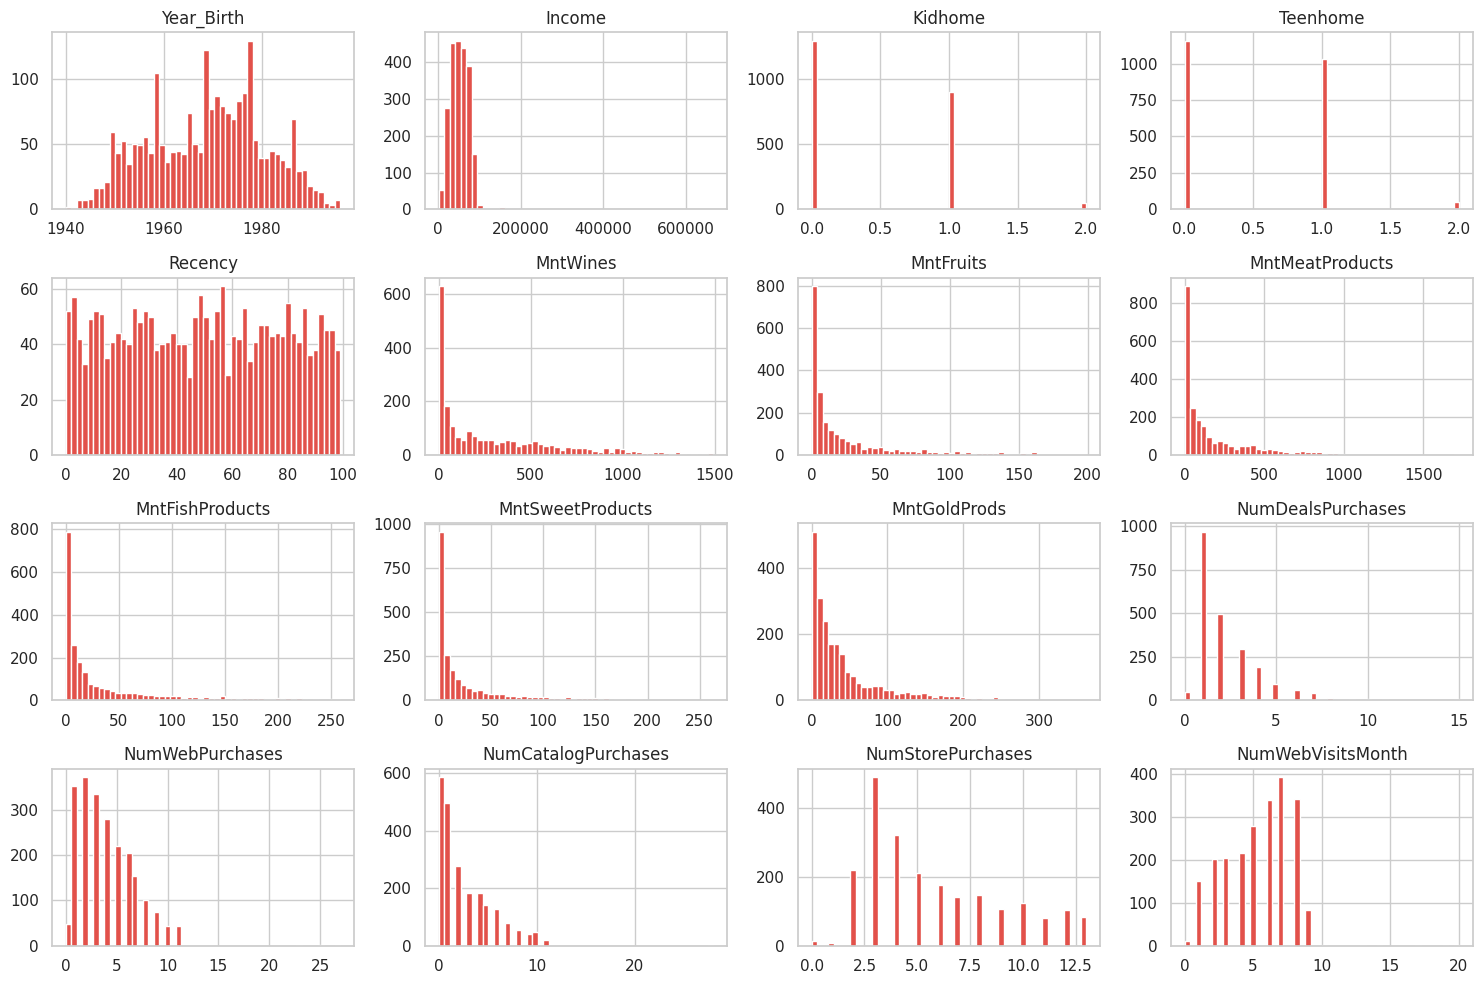

In [ ]:
numeric = dataset_to_plot.columns
numeric

fig = plt.figure(figsize=(15,10))
ax = plt.gca()

dataset.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

In [ ]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Pada kolom Marital Status, kita akan kategorikan YOLO, Alone dan Absurd menjadi Single.

Together kita asumsikan menjadi 1 kategori yaitu Married

Widow kita kategorikan menjadi divorce

In [ ]:
dataset['Marital_Status'] = dataset['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

In [ ]:
dataset['Marital_Status'] = dataset['Marital_Status'].apply(lambda x: 'Married' if str(x) in ['Together'] else str(x))

In [ ]:
dataset['Marital_Status'] = dataset['Marital_Status'].apply(lambda x: 'Divorce' if str(x) in ['Widow'] else str(x))

In [ ]:
dataset.Marital_Status.unique()

array(['Divorce', 'Single', 'Married'], dtype=object)

In [ ]:
dataset.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

Kita akan kategorikan 2n Cycle menjadi Master

In [ ]:
dataset['Education'] = dataset['Education'].apply(lambda x: 'Master' if str(x) in ['2n Cycle'] else str(x))

In [ ]:
dataset.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

Menambahkan kolom Customer Age dengan menghitung dari Tahun Customer mendaftar - Tahun kelahiran

In [ ]:
dataset['Customer_Age']  = dataset['Dt_Customer'].dt.year - dataset['Year_Birth']

<Axes: xlabel='Customer_Age', ylabel='Count'>

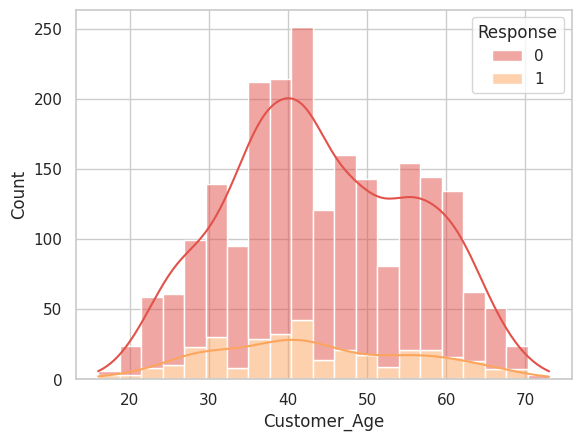

In [ ]:
sns.histplot(data=dataset, x='Customer_Age', hue='Response', multiple='stack', kde=True)

Bisa kita lihat bahwa customer yg menerima campaign lebih banyak diusia 40an

<Axes: xlabel='Education', ylabel='count'>

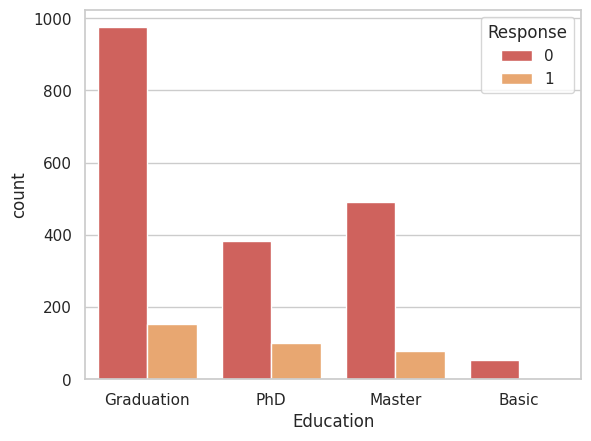

In [ ]:
sns.countplot(data=dataset, x='Education', hue='Response')

In [ ]:
def barPerc(dataset,xVar,ax):
    numX=len([x for x in dataset[xVar].unique() if x==x])
    bars = ax.patches
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

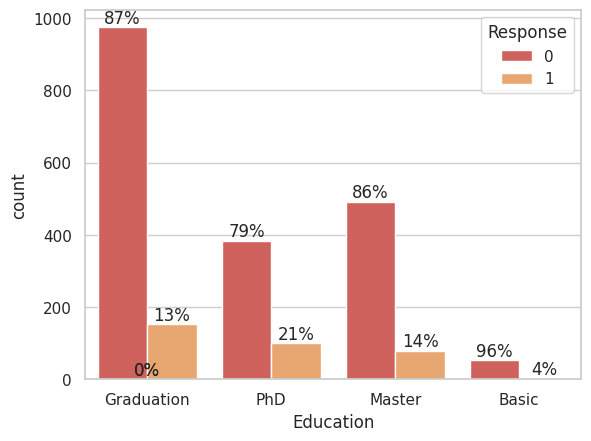

In [ ]:
ax = sns.countplot(x='Education', hue='Response', data=dataset)
barPerc(dataset, 'Education', ax)

Campaign lebih banyak direspon oleh orang dengan gelar PhD

(0.0, 175000.0)

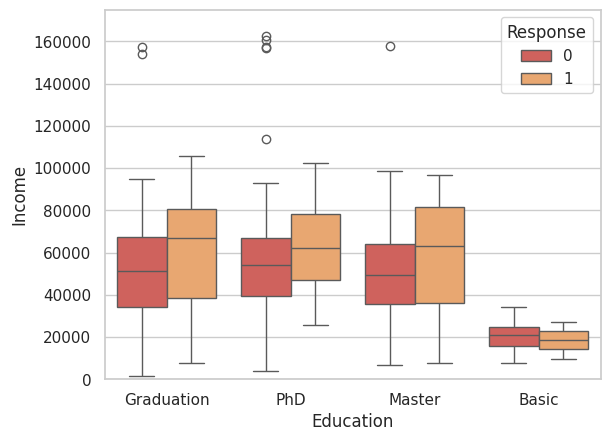

In [ ]:
sns.boxplot(data =dataset , x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

Orang yg baru lulus memiliki rata2 income yg tinggi dan cenderung banyak yg merespon

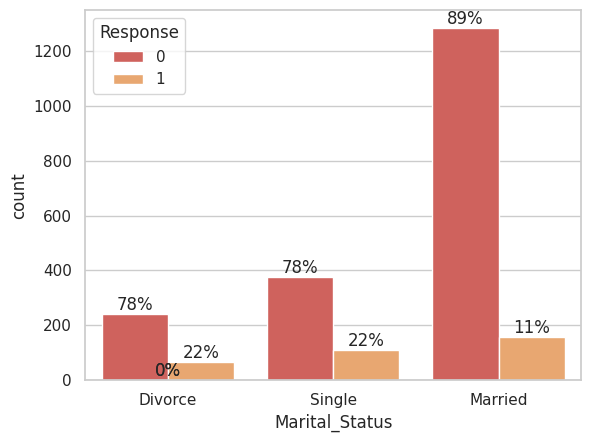

In [ ]:
ax = sns.countplot(x='Marital_Status', hue='Response', data=dataset)
barPerc(dataset, 'Marital_Status', ax)

Orang yg tinggal sendiri cenderung merespon campaign

Membuat kolom baru Dependant atau tanggungan dengan menambahkan jumlah anak dan remaja

In [ ]:
dataset['Num_Dependants'] = dataset['Kidhome'] + dataset['Teenhome']

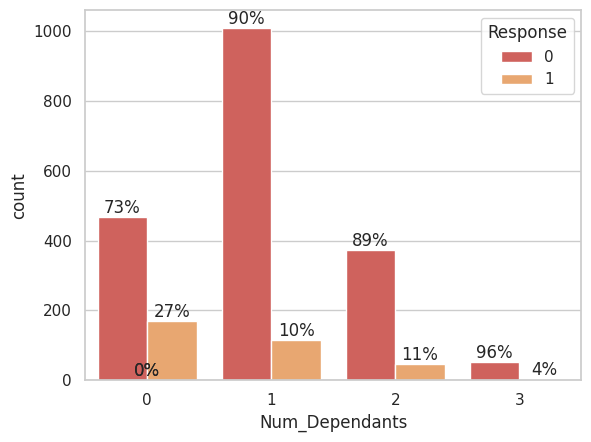

In [ ]:
ax = sns.countplot(x='Num_Dependants', hue='Response', data=dataset)
barPerc(dataset, 'Num_Dependants', ax)

Orang yg tidak memiliki tanggungan cenderung merespon campaign

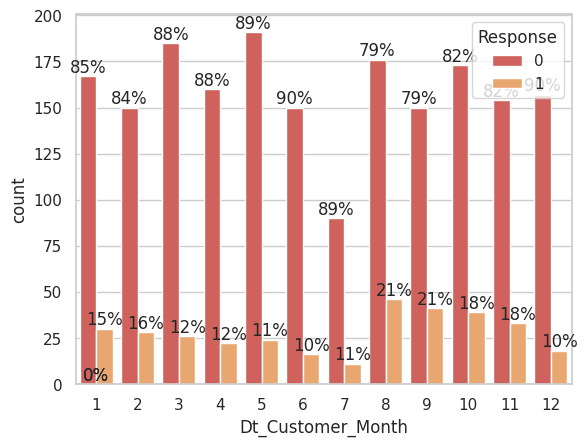

In [ ]:
dataset['Dt_Customer_Month'] = dataset['Dt_Customer'].dt.month
dataset['Dt_Customer_Year'] = dataset['Dt_Customer'].dt.year
ax = sns.countplot(x='Dt_Customer_Month', hue='Response', data=dataset)
barPerc(dataset, 'Dt_Customer_Month', ax)

Kebanyakan customer merespon pada bulan 8-9 atau agustus hingga november

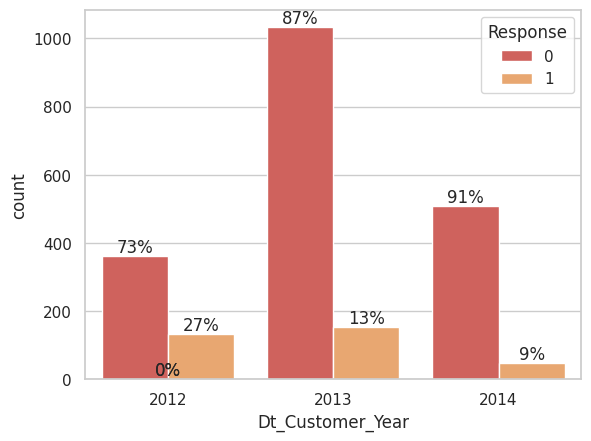

In [ ]:
ax = sns.countplot(x='Dt_Customer_Year', hue='Response', data=dataset)
barPerc(dataset, 'Dt_Customer_Year', ax)

Customer banyak merespon di tahun 2012

In [ ]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year
0,1826,1970,Graduation,Divorce,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014
3,1386,1967,Graduation,Married,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014


<Axes: xlabel='Recency', ylabel='Count'>

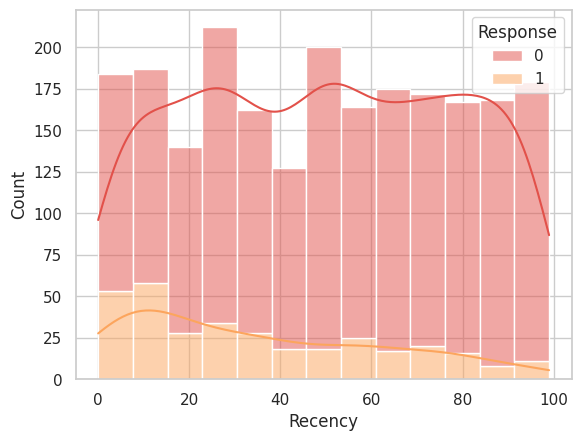

In [ ]:
sns.histplot(data=dataset, x='Recency', hue='Response', multiple='stack', kde=True)

Customer dengan last purchase 10 hari cenderung merespon

In [ ]:
amt_spent_features = [ c for c in dataset.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')
dataset[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


from matplotlib import pyplot as plt
_df_0['Response'].plot(kind='hist', bins=20, title='Response')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Response'].plot(kind='line', figsize=(8, 4), title='Response')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Response', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Wines adalah kategori produk yg banyak direspon

<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

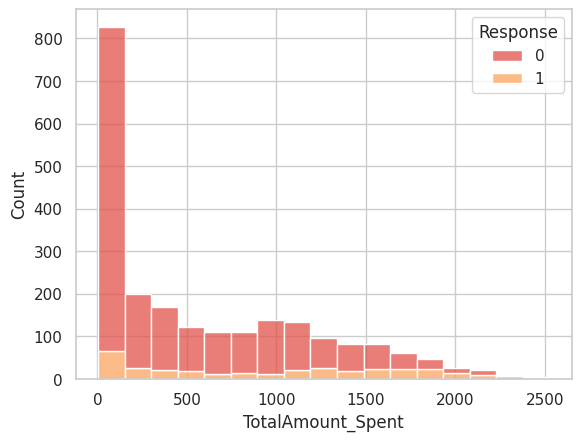

In [ ]:
amt_spent_features = [ c for c in dataset.columns if 'Mnt' in str(c)]
dataset['TotalAmount_Spent'] = dataset[amt_spent_features].sum(axis=1)

sns.histplot(data=dataset, kde=False, x='TotalAmount_Spent', hue='Response', multiple='stack')

In [ ]:
purchase_feature = [c for c in dataset.columns if 'Purchase' in str(c)]
purchase_feature.append('Response')

In [ ]:
dataset[purchase_feature].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


Customer merespon dengan membuat katalog

<Axes: xlabel='Total_Purchases', ylabel='Count'>

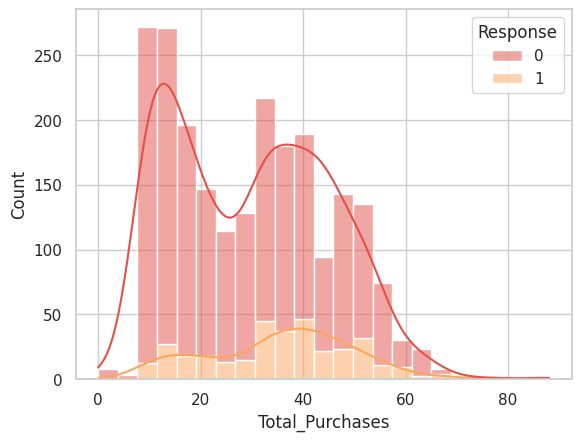

In [ ]:
purchase_feature = [c for c in dataset.columns if 'Purchase' in str(c)]
dataset['Total_Purchases'] = dataset[purchase_feature].sum(axis=1)
sns.histplot(data=dataset, kde=True, x='Total_Purchases', hue='Response', multiple='stack')

Total purchase customer di 40an

In [ ]:
dataset[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

# Tidak memiliki korelasi terhadap Response

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


In [ ]:
prev_cmp = [c for c in dataset.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')
dataset[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

#Merespon ketika dicampaign ke 5

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


In [ ]:
dataset[['Complain', 'Response']].corr()[['Response']]

# Tidak memiliki korelasi terhadap Response

,Response
Complain,0.000185
Response,1.000000


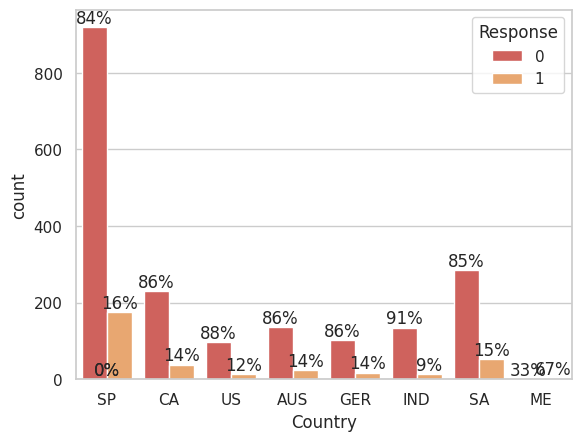

In [ ]:
ax = sns.countplot(x='Country', hue='Response', data=dataset)
barPerc(dataset, 'Country', ax)

Mexico banyak merespon dibanding negara lain

In [ ]:
df= pd.read_csv('drive/MyDrive/marketing_data.csv')
from sklearn.model_selection import

#membagi dataframe menjadi 2: data full train (80%) dan data test  (20&).
#20% data akan dipakai untuk tes, dan random sizenya 1 agar bisa lebih random
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

#data frame akan dibagi lagi disini df train dan df valid
# tes size 0.25 artinya 25% df full train yg diatas akan di split lagi untuk training
#60/20/20 untuk training validasi dan tes
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)


df_train.shape, df_valid.shape, df_test.shape
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

In [ ]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_valid.columns = df_valid.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

In [ ]:
df_train['Income'] = df_train['Income'].astype(str).str.replace('$', '')
df_train['Income'] = df_train['Income'].str.replace(',', '')
df_train['Income'] = df_train['Income'].astype('float')

df_valid['Income'] = df_valid['Income'].astype(str).str.replace('$', '')
df_valid['Income'] = df_valid['Income'].str.replace(',', '')
df_valid['Income'] = df_valid['Income'].astype('float')


In [ ]:
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])

df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])

df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [ ]:
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].mean())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].mean())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].mean())

In [ ]:
df_train = df_train[df_train['Year_Birth'] > 1900].reset_index(drop=True)
df_valid = df_valid[df_valid['Year_Birth'] > 1900].reset_index(drop=True)
df_test = df_test[df_test['Year_Birth'] > 1900].reset_index(drop=True)

In [ ]:
df_train['Customer_Age']  = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Customer_Age']  = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Customer_Age']  = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

In [ ]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

In [164]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Married' if str(x) in ['Together'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Married' if str(x) in ['Together'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Married' if str(x) in ['Together'] else str(x))

In [165]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Divorced' if str(x) in ['Widow'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Divorced' if str(x) in ['Widow'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Divorced' if str(x) in ['Widow'] else str(x))

In [173]:
df_train['Num_Dependants'] = df_train['Kidhome'] + df_train['Teenhome']
df_valid['Num_Dependants'] = df_valid['Kidhome'] + df_valid['Teenhome']
df_test['Num_Dependants'] = df_test['Kidhome'] + df_test['Teenhome']

df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year

df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df_train['TotalAmount_Spent'] = df_train[amt_spent_features].sum(axis=1)
df_valid['TotalAmount_Spent'] = df_valid[amt_spent_features].sum(axis=1)
df_test['TotalAmount_Spent'] = df_test[amt_spent_features].sum(axis=1)

purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
df_train['Total_Purchases'] = df_train[purchase_feature].sum(axis=1)
df_valid['Total_Purchases'] = df_valid[purchase_feature].sum(axis=1)
df_test['Total_Purchases'] = df_test[purchase_feature].sum(axis=1)

df_train['Education'] = df_train['Education'].apply(lambda x:'Master' if str(x) in ['2n Cycle'] else str(x))
df_valid['Education'] = df_valid['Education'].apply(lambda x:'Master' if str(x) in ['2n Cycle'] else str(x))
df_test['Education'] = df_test['Education'].apply(lambda x:'Master' if str(x) in ['2n Cycle'] else str(x))

In [174]:
display(df_train.head())
print()
display(df_valid.head())
print()
display(df_test.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,7143,1955,Master,Married,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,1,11,2013,820,26
1,6383,1971,PhD,Married,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,1,3,2014,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,35,1,8,2012,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,28,0,4,2014,1795,27


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,9204,1970,Graduation,Divorced,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,11,2012,928,14
2,4971,1962,PhD,Married,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,12,2012,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1,5,2014,578,20
4,4769,1977,Master,Married,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,2,6,2014,493,23


In [175]:
cmp_feat = [c for c in df.columns if 'AcceptedCmp' in str(c)]
mnt_feat = [c for c in df.columns if 'Mnt' in str(c)]
num_feat = [c for c in df.columns if 'Num' in str(c)]

numeric_feat = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
                'Num_Dependants', 'Dt_Customer_Month', 'Dt_Customer_Year',
                'TotalAmount_Spent', 'Total_Purchases']

all_numeric_feat = cmp_feat + mnt_feat + num_feat + numeric_feat

display(df_train[all_numeric_feat].head(2))
display(df_valid[all_numeric_feat].head(2))
display(df_test[all_numeric_feat].head(2))


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,58,1,11,2013,820,26
1,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,43,1,5,2014,46,8


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,9,2012,1029,17
1,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,11,2012,928,14


In [176]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


In [177]:
categoric_feat = ['Education', 'Marital_Status', 'Country']
all_feat = categoric_feat + all_numeric_feat
df_train_final = df_train[all_feat]
df_valid_final = df_valid[all_feat]
df_test_final = df_test[all_feat]

In [178]:
df_train.Education.unique()

array(['PhD', 'Graduation', 'Master', 'Basic'], dtype=object)

In [179]:
education = {'Basic':1 , 'Graduation':2,'Master':3 , 'PhD':4}

In [180]:
df_train_final['Education'] = df_train_final['Education'].map(education)
df_valid_final['Education'] = df_valid_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

df_train_final.head()

,Education,Marital_Status,Country,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,4,Single,CA,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,2,Married,SP,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23
2,3,Married,SP,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,12,2013,70,6
3,2,Married,SA,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6,76445.0,1,0,2,0,41,1,9,2012,1410,21
4,2,Single,SP,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9,22585.0,0,0,23,0,43,0,3,2013,81,5


In [183]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

In [184]:
df_train_final_dicts = df_train_final.to_dict(orient='records')
df_valid_final_dicts = df_valid_final.to_dict(orient='records')
df_test_final_dicts = df_test_final.to_dict(orient='records')

In [185]:
df_train_final_dicts = dv.fit_transform(df_train_final_dicts)

In [186]:
df_valid_final_dicts = dv.transform(df_valid_final_dicts)
df_test_final_dicts = dv.transform(df_test_final_dicts)

In [188]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

# ... (your existing code) ...

# Replace get_feature_names with get_feature_names_out
df_train_final = pd.DataFrame(df_train_final_dicts, columns = dv.get_feature_names_out())

In [191]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

# ... (your existing code) ...

# Replace get_feature_names with get_feature_names_out for both dataframes
df_valid_final = pd.DataFrame(df_valid_final_dicts, columns=dv.get_feature_names_out())
df_test_final = pd.DataFrame(df_test_final_dicts, columns=dv.get_feature_names_out())

In [192]:
X_train_final = df_train_final
X_valid_final = df_valid_final
X_test_final = df_test_final

In [193]:
y_train_final = df_train.Response
y_valid_final = df_valid.Response
y_test_final = df_test.Response

In [194]:
X_full_train_final = pd.concat([X_train_final, X_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
from sklearn.metrics import roc_auc_score

In [198]:
model = LogisticRegression(random_state=42)
model.fit(X_train_final, y_train_final)

y_valid_pred = model.predict_proba(X_valid_final)[:,1]

print('LogisticRegression ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

LogisticRegression ROCAUC Result: 0.743


In [199]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_final, y_train_final)

y_valid_pred = model.predict_proba(X_valid_final)[:,1]
print('RandomForest ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

RandomForest ROCAUC Result: 0.891


In [200]:
X_full_train_final = pd.concat([X_train_final, X_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

model = RandomForestClassifier(random_state=42)
model.fit(X_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [201]:
y_test_pred = model.predict_proba(X_test_final)[:,1]

print('RandomForest ROCAUC Result:' , roc_auc_score(y_test_final, y_test_pred).round(3))

RandomForest ROCAUC Result: 0.881


In [205]:
import shap

In [206]:
# menghitung shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_final)

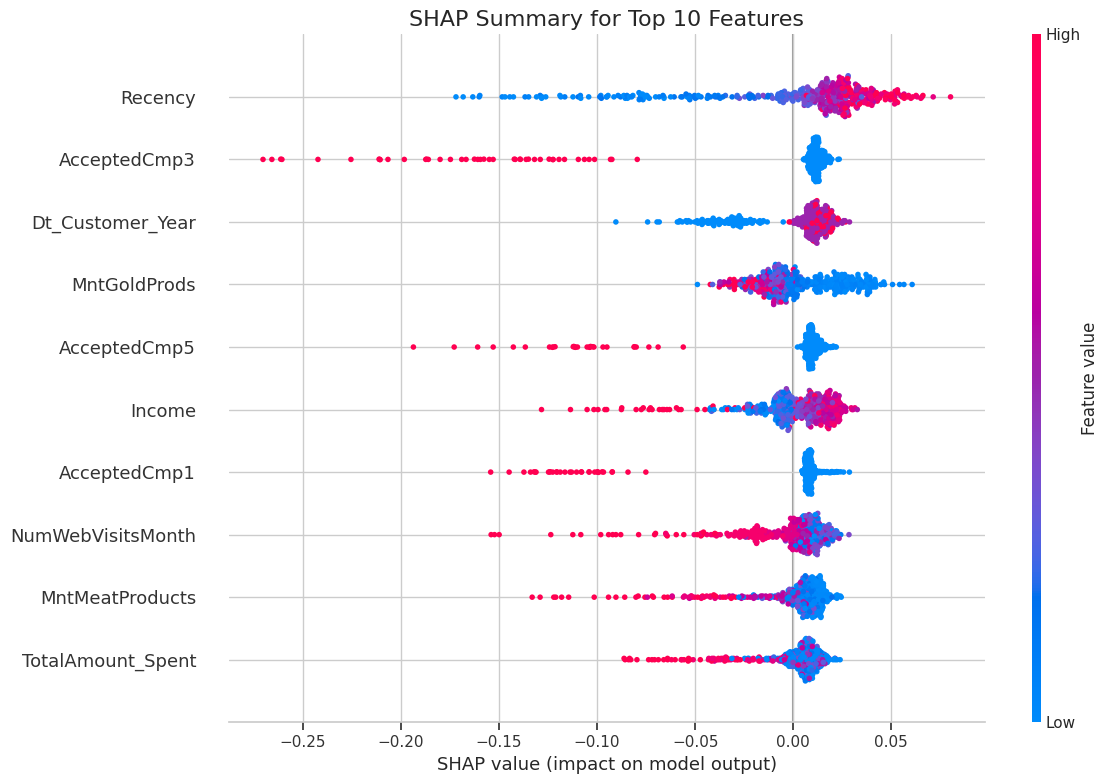

In [208]:
# plot
plt.title('SHAP Summary for Top 10 Features', size=16)

# Since your model output is multi-class(represented by shape (447, 39, 2))
#  You need to specify which class's SHAP values you want to plot
# For example, to plot for the first class, use shap_values[:,:,0]

shap.summary_plot(shap_values[:,:,0], X_test_final, max_display=10, plot_size=[12,8]) # using shap_values for the first class
# or
# shap.summary_plot(shap_values[:,:,1], X_test_final, max_display=10, plot_size=[12,8]) # using shap_values for the second class